In [1]:
import os
import json

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
with open('scores.csv', 'r') as f:
    scores = np.array([float(x) for x in list(f.readlines())])

In [3]:
mov_avg_100 = np.array([np.mean(scores[idx-min(idx, 100):max(1, idx)]) for idx, s in enumerate(scores)])

In [4]:
greater_than_pt5 = np.where(mov_avg_100 > 0.5)

In [44]:
indicies_greater_than_pt5 = np.split(greater_than_pt5[0], np.where(np.diff(greater_than_pt5[0]) > 1)[0]+1)[-1]

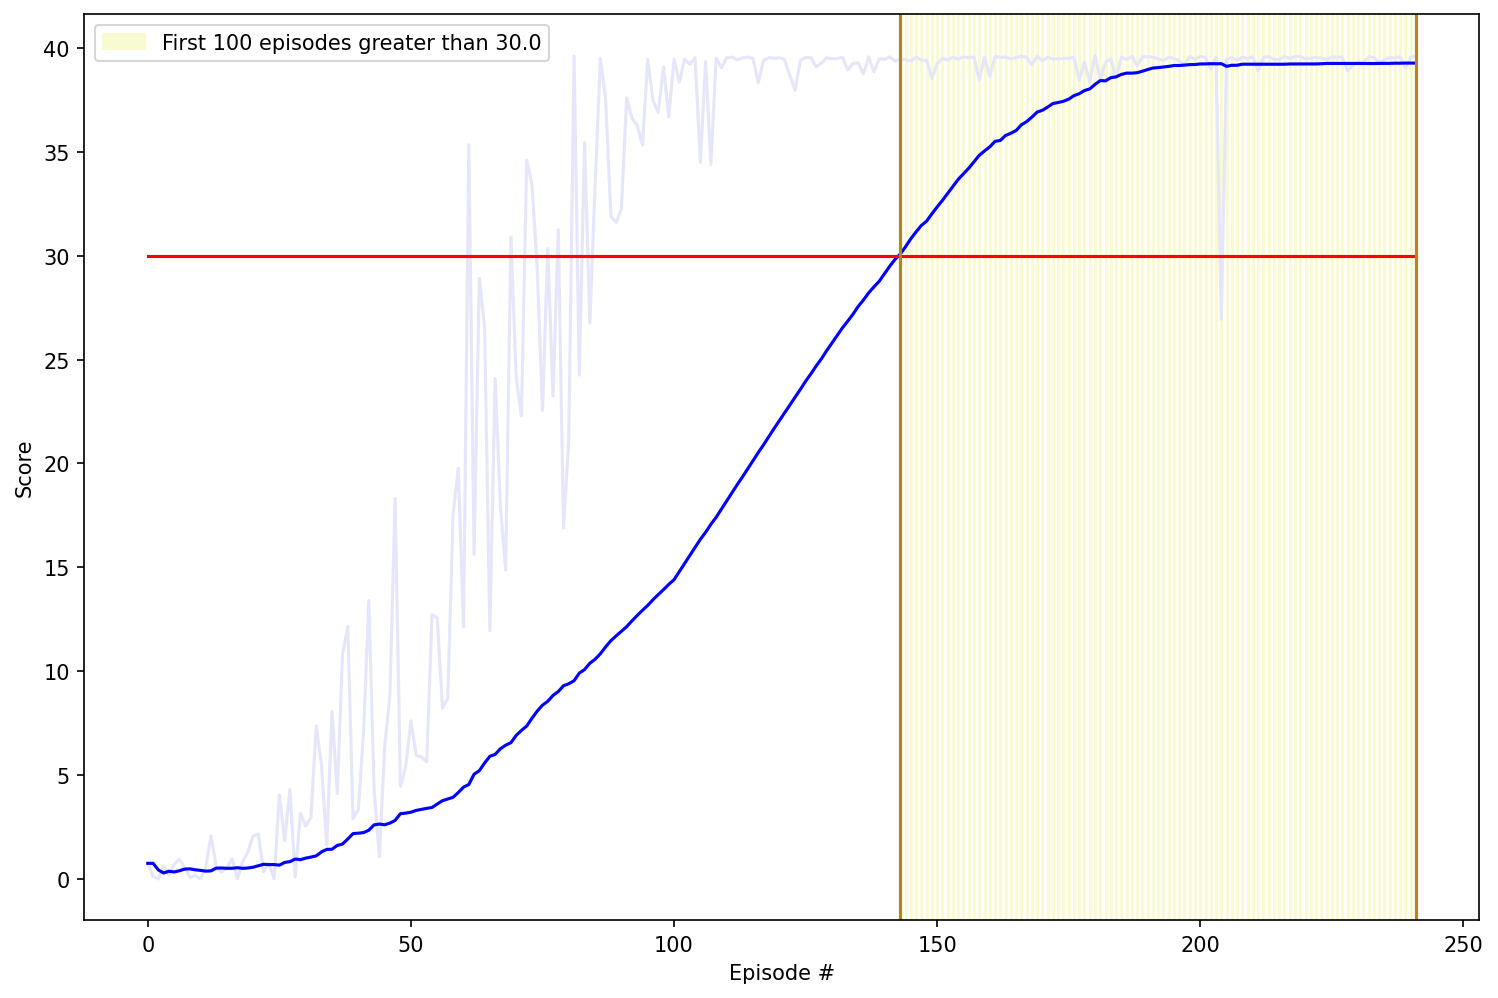

In [45]:
# plot the scores
fig = plt.figure(figsize=(12, 8), dpi=150)
ax = fig.add_subplot(111)
[plt.axvline(x=ix, color='lightgoldenrodyellow') for ix in idicies_greater_than_pt5]
plt.plot(np.arange(len(scores)), scores, color="lavender")
plt.plot(np.arange(len(scores)), mov_avg_100, color="blue")
plt.plot(np.arange(len(scores)), [30.0 for x in range(len(scores))], color="red")
plt.axvline(x=indicies_greater_than_pt5[0], color='darkgoldenrod')
plt.axvline(x=indicies_greater_than_pt5[-1], color='darkgoldenrod')
plt.ylabel('Score')
plt.xlabel('Episode #')

ind_greater_than_30 = mpatches.Patch(color='lightgoldenrodyellow', label='First 100 episodes greater than 0.5')
plt.legend(handles=[ind_greater_than_pt5])

plt.savefig(f'scores.png')
plt.show()